# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [534]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results,mouse_metadata,how = 'left', on = "Mouse ID")

# Display the data table for preview
combined_df.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [535]:
# Checking the number of mice.

len(combined_df["Mouse ID"].unique())

249

In [536]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse_ids = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
duplicate_mouse_ids


array(['g989'], dtype=object)

In [537]:
# Optional: Get all the data for the duplicate mouse ID. 

mouse_g989 = combined_df[combined_df["Mouse ID"] == 'g989']
mouse_g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [538]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#cleaned_df = combined_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

cleaned_df = combined_df[~(combined_df['Mouse ID']== 'g989')]
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [539]:
# Checking the number of mice in the clean DataFrame.

len(cleaned_df["Mouse ID"].unique())

248

## Summary Statistics

In [540]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_mouse = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_mouse = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var_mouse = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stD_mouse = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
stE_mouse = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

mousAry_df = pd.DataFrame({
    'Mean Tumor Volume':mean_mouse, 
    'Median Tumor Volume':median_mouse, 
    'Tumor Volume Variance':var_mouse, 
    'Tumor Volume Std. Dev.':stD_mouse, 
    'Tumor Volume Std Err.':stE_mouse
})


mousAry_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [541]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

group_mouse = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].aggregate(['mean','median','var','std','sem'])
group_mouse

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

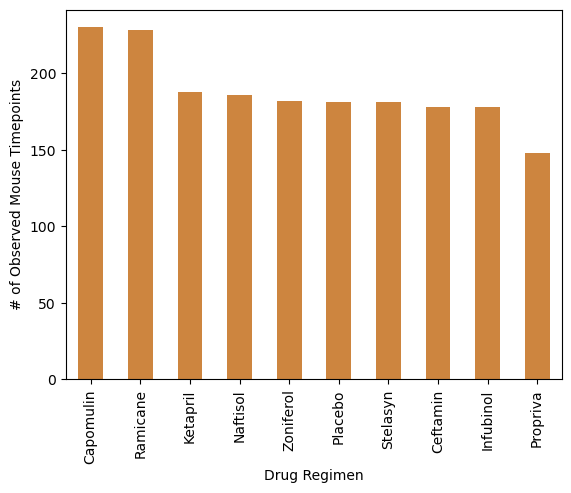

In [542]:
# Generate a bar plot showing the total number of rows 
#(Mouse ID/Timepoints) for each drug regimen using Pandas.

#set up data
mouse_timepoints = cleaned_df.groupby('Drug Regimen').size().sort_values(ascending=False)

#plot
mouse_timepoints.plot.bar(xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints', color='peru')

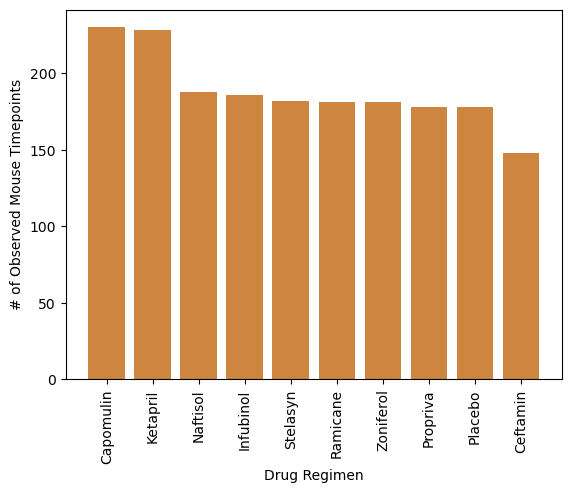

In [543]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) 
#for each drug regimen using pyplot.

# get data
x_vals = cleaned_df['Drug Regimen'].unique()

# create chart
plt.bar(x_vals,mouse_timepoints, color='peru')

# label x & y axis
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# rotate the x tick labels
plt.xticks(rotation = 90)

# display 
plt.show()


Text(0, 0.5, 'Sex')

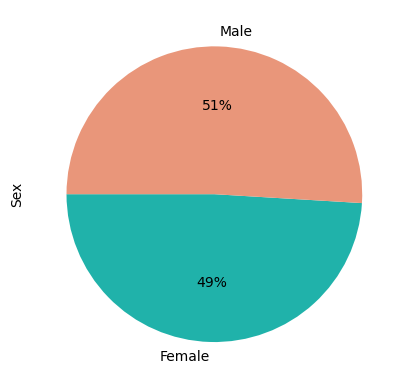

In [544]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# pick colors
colors = ['lightseagreen','darksalmon']

# create chart
pie_sex = cleaned_df.groupby(['Sex']).size().plot(kind='pie',y='Sex',autopct='%1.00f%%', colors=colors, startangle = 180)  

# add y-label. For some reason when I tried to add it in the .plot code, it would not show up
pie_sex.set_ylabel("Sex")

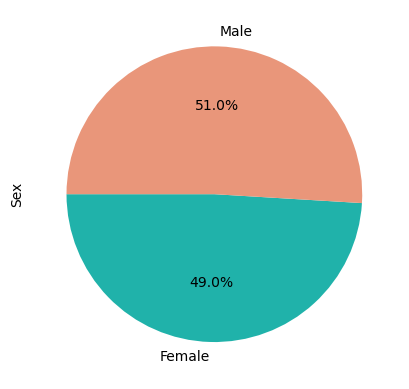

In [545]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# get data, labels, set colors
by_sex = cleaned_df.groupby(['Sex']).size()
labels=cleaned_df['Sex'].unique()
colors= ['lightseagreen','darksalmon']

# create pie
plt.pie(by_sex, labels=labels, colors=colors, autopct='%1.1f%%', startangle=180)
plt.ylabel('Sex')

# display pie
plt.show()

## Quartiles, Outliers and Boxplots

In [546]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

largest_time=cleaned_df.sort_values(['Mouse ID','Timepoint']).reset_index(drop=True)

largest_only=largest_time.drop_duplicates(['Mouse ID'], keep='last')




In [569]:
treatments=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

cap = []
ram = []
inf = []
cef = []

for t in range(len(treatments)):
    for l in range(len(largest_only)):
        if  largest_only.iloc[l]["Drug Regimen"]== 'Capomulin':
            cap.append(largest_only.iloc[l]['Tumor Volume (mm3)'])
            
        elif largest_only.iloc[l]["Drug Regimen"]== 'Ramicane':
            ram.append(largest_only.iloc[l]['Tumor Volume (mm3)'])
        elif largest_only.iloc[l]["Drug Regimen"]== 'Infubinol':
            inf.append(largest_only.iloc[l]['Tumor Volume (mm3)'])
        elif largest_only.iloc[l]["Drug Regimen"]== 'Ceftamin':
            cef.append(largest_only.iloc[l]['Tumor Volume (mm3)'])
        else:
            pass
    
outliers = {}

        # Filter the DataFrame for the current treatment
group_values = largest_only[largest_only['Drug Regimen']== treatment]['Tumor Volume (mm3)']

    # Calculate potential outliers for the current treatment
q1 = group_values.quantile(0.25)
q3 = group_values.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

    # Identify potential outliers
couldbe_outlier = group_values[(group_values < lower_bound) | (group_values > upper_bound)]

    # Store potential outliers in the dict using the treatment name
outliers[treatment] = couldbe_outlier.tolist()

# Print the results
for treatment, couldbe_outlier in outliers.items():
    print(f"{treatments}'s potential outliers: {couldbe_outlier}")


['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']'s potential outliers: []


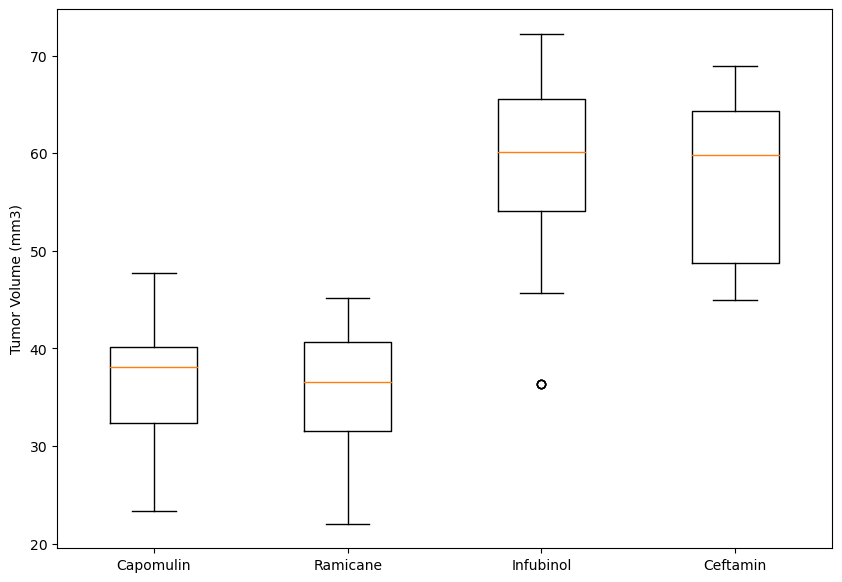

In [576]:
data_plot = [cap, ram, inf, cef]
    # Create the box plot
fig, ax = plt.subplots(figsize=(10, 7))

# Set the x-axis tick labels to the treatment names

# Set the y-axis label
ax.set_ylabel('Tumor Volume (mm3)')
# Set the title of the plot
ax.boxplot(data_plot, labels = treatments)
    # Show the plot
plt.show()

## Line and Scatter Plots

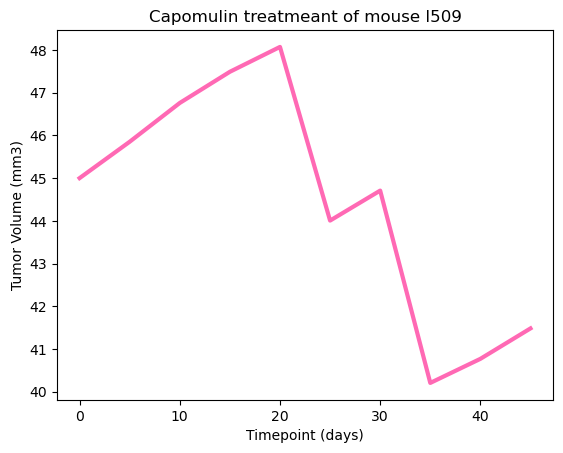

In [584]:
# Generate a line plot of tumor volume vs. time point for a
#single mouse treated with Capomulin

M_1509_df = largest_time.loc[largest_time["Mouse ID"] == "l509",:]

x_ax = M_1509_df["Timepoint"]
y_ax = M_1509_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_ax, y_ax, linewidth=3, markersize=2, color='hotpink')

plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')


plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

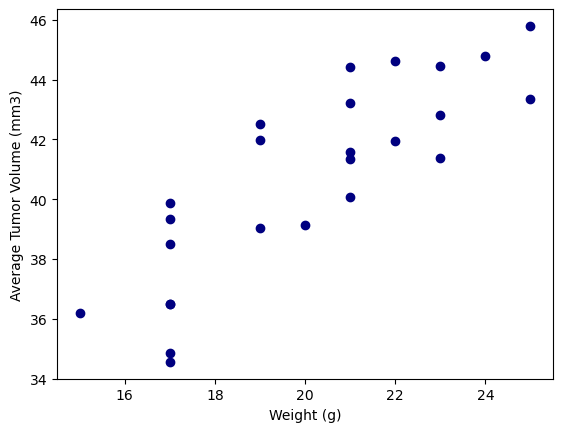

In [604]:
# Generate a scatter plot of mouse weight vs. the
#average observed tumor volume for the entire Capomulin regimen

cap_df = cleaned_df.loc[cleaned_df["Drug Regimen"]=="Capomulin",:].groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean()

tumor = (cap_df["Weight (g)"])
weight = (cap_df["Tumor Volume (mm3)"])
plt.scatter(tumor, weight,color ="navy")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


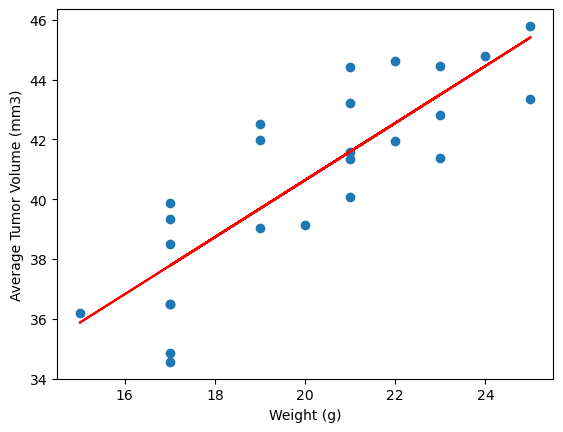

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


,Drug Regimen,Tumor Volume (mm3)
0,Infubinol,67.973419
1,Infubinol,65.525743
2,Ceftamin,62.999356
3,Ramicane,38.407618
4,Ramicane,43.047543
...,...,...
95,Ceftamin,68.594745
96,Capomulin,31.896238
97,Ceftamin,64.729837
98,Ramicane,30.638696
